<a href="https://colab.research.google.com/github/Ron1423/Dondon.idn/blob/master/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membuat feature engineering dan evaluasi model pada data consumer complaint prediction menggunakan:
1. Count vectorizer
2. Co-occurrence matrix

In [2]:
#Hubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [5]:
#membaca dataset yang sudah di upload ke google dirve

Data = pd.read_csv("drive/My Drive/Expert System/consumer_complaints.csv",encoding='latin-1')

<ipython-input-5-e730e22124a7>:3: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv("drive/My Drive/Expert System/consumer_complaints.csv",encoding='latin-1')


In [ ]:
#Inisialisasi data colom untuk 'product' dan 'consumer_complaint_narrative'
Data = Data[['product','consumer_complaint_narrative']]

#Mengambil data pada colom 'consumer_complaint_narrative'
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

#tampilkan 5 data terbawah
Data.tail()

#Mengambil data pada kolom 'procuct'
Data['category_id'] = Data['product'].factorize()[0]

#tampilkan 5 data terbawah
Data.tail()

,product,consumer_complaint_narrative,category_id
553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h...",4
553085,Credit reporting,Reflecting incorrect payment status. Have been...,4
553086,Payday loan,I have been paying {$180.00} a month through d...,7
553090,Mortgage,I recently became aware that Amerisave Mortgag...,2
553096,Mortgage,Bank of America has demonstrated an on-going l...,2


Melakukan Preprocessing

In [ ]:
#a. Buat lowercase untuk data kolom 'comsumer_complaint_narrative'

Data['consumer_complaint_narrative'] = Data['consumer_complaint_narrative'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
Data['consumer_complaint_narrative']

190126    xxxx has claimed i owe them {$27.00} for xxxx ...
190135    due to inconsistencies in the amount owed that...
190155    in xx/xx/xxxx my wages that i earned at my job...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xx/xx/xxxx. at the time i s...
                                ...                        
553084    xxxx xxxx is reporting incorrectly, payments h...
553085    reflecting incorrect payment status. have been...
553086    i have been paying {$180.00} a month through d...
553090    i recently became aware that amerisave mortgag...
553096    bank of america has demonstrated an on-going l...
Name: consumer_complaint_narrative, Length: 66806, dtype: object

In [ ]:
#b. remove punctuation
Data['consumer_complaint_narrative'] = Data['consumer_complaint_narrative'].str.replace('[^\w\s]','')
Data['consumer_complaint_narrative'] = Data['consumer_complaint_narrative'].str.replace('((www\.[^\s]+)|(https?://[^\s]+)|(hrefhttp?://[^\s]+))','URL')

Data['consumer_complaint_narrative']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


190126    xxxx has claimed i owe them 2700 for xxxx year...
190135    due to inconsistencies in the amount owed that...
190155    in xxxxxxxx my wages that i earned at my job d...
190207    i have an open and current mortgage with chase...
190208    xxxx was submitted xxxxxxxx at the time i subm...
                                ...                        
553084    xxxx xxxx is reporting incorrectly payments ha...
553085    reflecting incorrect payment status have been ...
553086    i have been paying 18000 a month through direc...
553090    i recently became aware that amerisave mortgag...
553096    bank of america has demonstrated an ongoing le...
Name: consumer_complaint_narrative, Length: 66806, dtype: object

In [ ]:
#c. Remove stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
Data['consumer_complaint_narrative'] = Data['consumer_complaint_narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


Data['consumer_complaint_narrative']

NameError: ignored

<function matplotlib.pyplot.show>

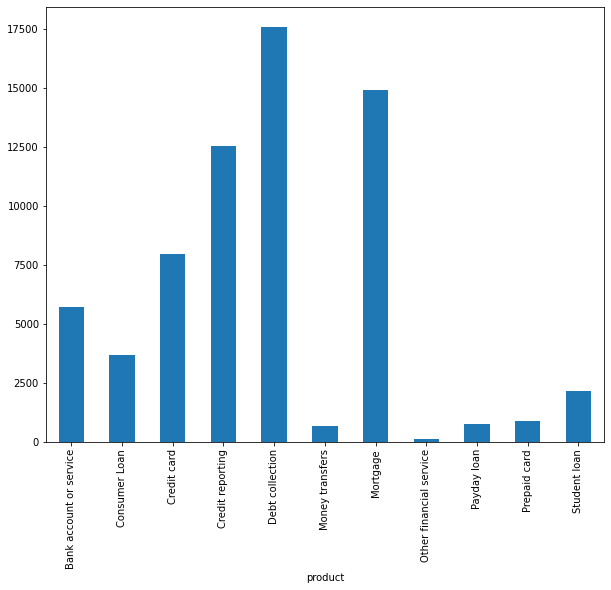

In [ ]:
Data.groupby('product').consumer_complaint_narrative.count()

fig = plt.figure(figsize = (10,8))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show

In [ ]:
#Split data 'product' dan 'consumer_complaint_narrative' menjadi 2 (train dan valid)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

tfidf_vect.fit(Data['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [ ]:
#buat model dengan Logistic regerssion

#model building and evaluation
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

#model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#Checking accuracy
acc = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print("Accuracy: ", acc)

#Classification report
print(metrics.classification_report(valid_y,model.predict(xvalid_tfidf),target_names=Data['product'].unique()))


Accuracy:  0.8459465932223685
                         precision    recall  f1-score   support

        Debt collection       0.82      0.80      0.81      1428
          Consumer Loan       0.76      0.59      0.66       936
               Mortgage       0.80      0.82      0.81      1974
            Credit card       0.85      0.85      0.85      3080
       Credit reporting       0.82      0.89      0.86      4400
           Student loan       0.73      0.57      0.64       159
Bank account or service       0.92      0.95      0.94      3767
            Payday loan       0.00      0.00      0.00        29
        Money transfers       0.71      0.32      0.44       184
Other financial service       0.81      0.61      0.69       206
           Prepaid card       0.90      0.80      0.85       539

               accuracy                           0.85     16702
              macro avg       0.74      0.65      0.69     16702
           weighted avg       0.84      0.85      0.84    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

<function matplotlib.pyplot.show>

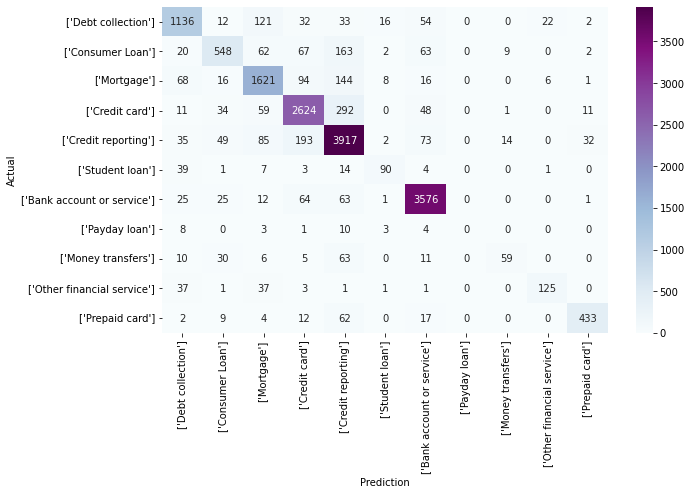

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_df = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",
            xticklabels=category_id_df[['product']].values,
            yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show
